In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd


In [2]:
#用pandas讀取文件，並顯示前三行內容
raw_df = pd.read_csv('listings_bad2.csv',encoding='utf-8')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
print('欄位數:',len(raw_df.columns))
raw_df.head(3)

The dataset contains 3032 Airbnb listings
欄位數: 106


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18935800,https://www.airbnb.com/rooms/18935800,20190730190716,2019-07-30,"SHIDA, NTNU, NTU Room C (monthly rental) 儘提供月租...",This is a single bed room with full furnitures...,This room is a single bed room with a wardrobe...,This is a single bed room with full furnitures...,none,"The flat is located on SHIDA RAOD 師大路, with on...",* Lease longer than 7 months will have additio...,- 2 min walks to NTNU - 10 min walks to NTU ...,"Shared small living room, shared bathroom, sha...",NaN,"- * This is a shared flat in residential area,...",NaN,NaN,https://a0.muscache.com/im/pictures/b2021251-e...,NaN,130827969,https://www.airbnb.com/users/show/130827969,Wenchi,2017-05-17,"New Taipei City, Taiwan",NaN,within a day,60%,NaN,f,https://a0.muscache.com/im/pictures/11c62ecb-4...,https://a0.muscache.com/im/pictures/11c62ecb-4...,Da'an,52,52,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Da’an District, Taipei City, Taiwan",Da'an,大安區,NaN,Da’an District,Taipei City,106,Taipei,"Da’an District, Taiwan",TW,Taiwan,25.02285,121.52796,f,Apartment,Private room,1,1.0,1,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$591.00,NaN,NaN,"$4,000.00",$0.00,1,$0.00,31,1125,31,31,1125,1125,31.0,1125.0,2 months ago,t,0,23,53,328,2019-07-30,2,0,2017-08-14,2017-11-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,"{""Taiwan VAT Tax""}",f,f,strict_14_with_grace_period,f,f,52,2,50,0,0.08
1,68398,https://www.airbnb.com/rooms/68398,20190730190716,2019-07-30,Tonghua Vacation Studio C,Convenient location; close to MRT and walking ...,Private Studio apartment with ensuite bathroom...,Convenient location; close to MRT and walking ...,none,Locates in a quiet neighborhood of Tonghua Str...,Please note that there is no elevator in the b...,7 mind walk to MRT Xinyi Anhe Station 10 minut...,"26"" TV Sofa couch & Coffee table Queen size do...",NaN,[ Tenant Policy ] The minimum stay is 1 mont...,NaN,NaN,https://a0.muscache.com/im/pictures/28357420/c...,NaN,339014,https://www.airbnb.com/users/show/339014,Lisa,2011-01-07,"Taipei, Taiwan",Hello world!! My name is Lisa and I'm super ex...,within an hour,100%,NaN,t,https://a0.muscache.com/im/users/339014/profil...,https://a0.muscache.com/im/users/339014/profil...,Da'an,12,12,"['email', 'phone', 'fac

In [3]:
#先刪除爬取與房源相關的欄位資訊
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_identity_verified', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [4]:
#顯示各欄的資料空值筆數
df.isna().sum()

id                                                 0
experiences_offered                                0
host_since                                         0
host_response_time                               371
host_response_rate                               371
host_acceptance_rate                            3032
host_is_superhost                                  0
host_listings_count                                0
host_total_listings_count                          0
host_has_profile_pic                               0
street                                             0
neighbourhood                                     51
neighbourhood_cleansed                             0
neighbourhood_group_cleansed                    3032
city                                              79
state                                            162
zipcode                                          115
market                                             0
smart_location                                

In [5]:
#刪除空值比率過高的欄位，將id欄位設為index
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed', 'square_feet', 'weekly_price', 'monthly_price', 'license' ], axis=1, inplace=True)

df.set_index('id', inplace=True)

In [6]:
#觀察資料內容發現host_listings_count與host_total_listings_count兩個欄位的數值是完全相同的，比對內容後只有3個不同，主要這三個欄位為空值
print(sum((df.host_listings_count == df.host_total_listings_count) == False))

0


In [7]:
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:3]

,id,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month


In [8]:
#刪除host_total_listings_count欄位以及與他相關的欄位
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [9]:
#將經緯度欄位合併，用於後續內容
lat_long = df[['latitude', 'longitude']]

In [10]:
#因為都在台北市，將城市相關的內容刪除
df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact','jurisdiction_names'], axis=1, inplace=True)

In [11]:
#除了minimum_nights與maximum_nights之外，minimum_minimum_nights、maximum_minimum_nights定義較不明確
#參考其餘文章後決定保留minimum_nights與maximum_nights，其餘刪除
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

In [12]:
#將剩餘欄位有 f/t 改為 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

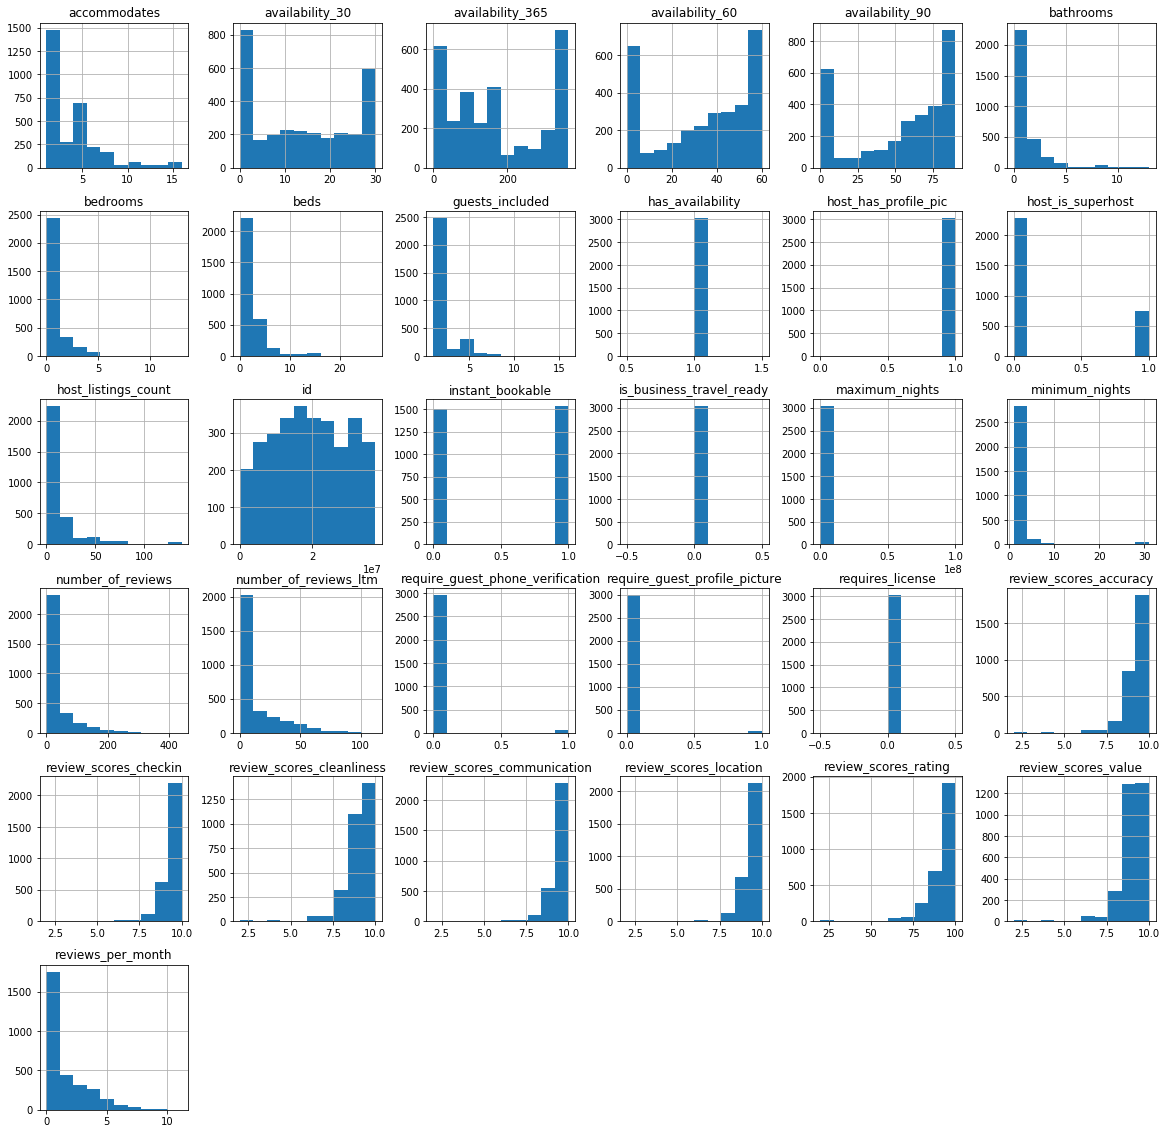

In [13]:
#顯示剩餘欄的直方圖，觀察內容分布
df.hist(figsize=(20,20));

In [14]:
#觀察發現其中有些欄位屬性較為單一，將這些欄位刪除
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [15]:
#顯示剩餘欄位
df.isna().sum()

id                                0
experiences_offered               0
host_since                        0
host_response_time              371
host_response_rate              371
host_is_superhost                 0
host_listings_count               0
neighbourhood_cleansed            0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         2
bedrooms                          0
beds                              3
bed_type                          0
amenities                         0
price                             0
security_deposit               1010
cleaning_fee                    690
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
calendar_updated                  0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365            

In [16]:
#統計experiences_offered欄位各資料出現次數
df.experiences_offered.value_counts()

none    3032
Name: experiences_offered, dtype: int64

In [17]:
#數值全部都是none，刪除此欄
df.drop('experiences_offered', axis=1, inplace=True)

In [18]:
#用pandas轉換天數
df.host_since = pd.to_datetime(df.host_since) 

#計算房東加入時間到2019.8.1的總天數
df['host_days_active'] = (datetime(2019, 8, 1) - df.host_since).astype('timedelta64[D]')

#顯示平均與中位天數
print("平均 days as host:", round(df['host_days_active'].mean(),0))
print("中位 days as host:", df['host_days_active'].median())

平均 days as host: 1367.0
中位 days as host: 1378.0


In [19]:
#將空值的三筆替換為中位天數
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

In [20]:
#定義等級分布
def bin_column(col, bins, labels, na_label='unknown'):
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [21]:
#將host_since依天數分類為 0~1 years,1-3 years,3-5 years,5-10 years
bin_column('host_days_active',
           bins=[0, 365, 1095, 1825, max(df.host_days_active)],
           labels=['0-1 years',
                   '1-3 years',
                   '3-5 years',
                   '5-10 years'],
           na_label='unknown')

In [22]:
#顯示分類後的各等級筆數
df.host_days_active.value_counts()

3-5 years     1440
1-3 years      736
5-10 years     652
0-1 years      204
Name: host_days_active, dtype: int64

In [23]:
#計算df.host_response_time的空值比例
print("空值筆數:", df.host_response_time.isna().sum())
print(f"空值比例: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

空值筆數: 371
空值比例: 12.2%


In [24]:
#顯示各項筆數
df.host_response_time.value_counts()

within an hour        2192
within a few hours     296
within a day           139
a few days or more      34
Name: host_response_time, dtype: int64

In [25]:
#將空值補為眾數within an hour
df.host_response_time.fillna("within an hour", inplace=True)
df.host_response_time.value_counts()

within an hour        2563
within a few hours     296
within a day           139
a few days or more      34
Name: host_response_time, dtype: int64

In [26]:
#計算df.host_response_rate的空值比例
print("Null values:", df.host_response_rate.isna().sum())
print(f"空值比例: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")

Null values: 371
空值比例: 12.2%


In [27]:
#計算df.host_response_rate的平均數與中位數
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')
print("平均 host response rate:", round(df['host_response_rate'].mean(),0))
print("中位數 host response rate:", df['host_response_rate'].median())
print(f"100%回覆的比率: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

平均 host response rate: 96.0
中位數 host response rate: 100.0
100%回覆的比率: 75.5%


In [28]:
#將空值補為平均數
df.host_response_rate.fillna(df.host_response_rate.mean(), inplace=True)
df.host_response_rate.value_counts()

100.000000    2009
96.361142      371
98.000000      105
99.000000      103
97.000000       48
96.000000       46
90.000000       44
80.000000       41
95.000000       29
50.000000       26
92.000000       25
0.000000        24
75.000000       18
94.000000       16
67.000000       15
93.000000       12
60.000000       10
88.000000        9
91.000000        7
81.000000        7
83.000000        7
85.000000        6
86.000000        6
84.000000        6
65.000000        5
30.000000        5
70.000000        5
87.000000        3
63.000000        3
82.000000        3
77.000000        3
71.000000        3
33.000000        3
89.000000        3
69.000000        2
40.000000        1
74.000000        1
78.000000        1
20.000000        1
Name: host_response_rate, dtype: int64

In [29]:
#計算df.host_is_superhost的空值比例
print("空值筆數:", df.host_is_superhost.isna().sum())

空值筆數: 0


In [30]:
#將空值補為0(f)
df.host_is_superhost.fillna(0 , inplace=True)
df.host_is_superhost.value_counts()

0    2283
1     749
Name: host_is_superhost, dtype: int64

In [31]:
#計算df.host_listings_count的空值比例
print("空值筆數:", df.host_listings_count.isna().sum())

空值筆數: 0


In [32]:
#將df.host_listings_count依間數分類為 1 room,2~5 rooms,6-10 rooms,11~30 rooms,31~50 rooms,51~100 rooms,100+ rooms
bin_column('host_listings_count',
           bins=[0, 1, 5, 10, 30, 50, 100, max(df.host_listings_count)],
           labels=['1 room',
                   '2-5 rooms',
                   '6-10 rooms',
                   '11-30 rooms',
                   '31-50 rooms',
                   '51-100 rooms',
                   '100+ rooms'],
           na_label='unknown')

In [33]:
#顯示分類後的各等級筆數
df.host_listings_count.value_counts()

2-5 rooms       826
11-30 rooms     731
6-10 rooms      690
1 room          436
31-50 rooms     165
51-100 rooms    149
100+ rooms       35
Name: host_listings_count, dtype: int64

In [34]:
#將空值的三筆補眾數
df.host_listings_count.replace('nan','2-5 rooms', inplace=True)

In [35]:
#顯示分類後的各等級筆數
df.host_listings_count.value_counts()

2-5 rooms       826
11-30 rooms     731
6-10 rooms      690
1 room          436
31-50 rooms     165
51-100 rooms    149
100+ rooms       35
Name: host_listings_count, dtype: int64

In [36]:
#顯示各區的房間數量
df.neighbourhood_cleansed.value_counts()

萬華區    669
大安區    522
中正區    446
中山區    421
信義區    293
大同區    208
松山區    120
士林區    105
北投區     82
文山區     64
內湖區     62
南港區     40
Name: neighbourhood_cleansed, dtype: int64

In [37]:
#顯示各種房源種類數量
df.property_type.value_counts()

Apartment                 1790
Condominium                380
Hostel                     187
House                      163
Serviced apartment         114
Loft                        92
Boutique hotel              63
Townhouse                   45
Guest suite                 43
Bed and breakfast           39
Other                       24
Minsu (Taiwan)              23
Aparthotel                  22
Hotel                       17
Bungalow                     7
Guesthouse                   7
Villa                        6
Dorm                         5
Hut                          2
Heritage hotel (India)       2
Tent                         1
Name: property_type, dtype: int64

In [38]:
#顯示各種房間種類數量
df.room_type.value_counts()

Entire home/apt    1585
Private room       1178
Shared room         269
Name: room_type, dtype: int64

In [39]:
#顯示bathrooms、bedrooms、beds三欄的空值比例
print("bathrooms空值筆數:", df.bathrooms.isna().sum())
print(f"空值比例: {round((df.bathrooms.isna().sum()/len(df))*100, 1)}%")
print("bedrooms空值筆數:", df.bedrooms.isna().sum())
print(f"空值比例: {round((df.bedrooms.isna().sum()/len(df))*100, 1)}%")
print("beds空值筆數:", df.beds.isna().sum())
print(f"空值比例: {round((df.beds.isna().sum()/len(df))*100, 1)}%")

bathrooms空值筆數: 2
空值比例: 0.1%
bedrooms空值筆數: 0
空值比例: 0.0%
beds空值筆數: 3
空值比例: 0.1%


In [40]:
#將bathrooms、bedrooms、beds三欄的空值替換為中位數
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [41]:
#顯示bed_type的各項筆數
df.bed_type.value_counts()

Real Bed         3004
Futon              18
Pull-out Sofa       8
Airbed              1
Couch               1
Name: bed_type, dtype: int64

In [42]:
#由於主要都是Real Bed，將此項刪除
#df.drop('bed_type', axis=1, inplace=True)

In [43]:
#將price的$去除，轉化為int
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

count      3032.000000
mean       2468.294195
std       11410.090742
min         311.000000
25%         995.000000
50%        1492.000000
75%        2239.000000
max      310919.000000
Name: price, dtype: float64


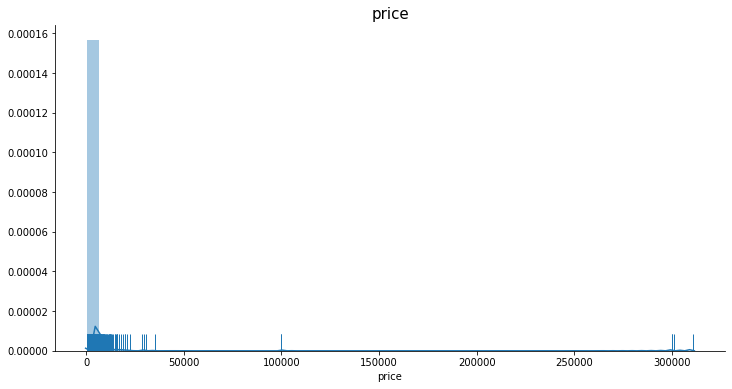

In [44]:

print(df.price.describe())
plt.figure(figsize = (12 , 6))
plt.title('price' , fontsize = 15)
sns.distplot(df.price.dropna() , rug = True)
sns.despine()

In [45]:
df[df.price > 12000].price.value_counts()

12810     2
19992     2
12001     2
99992     2
15888     2
14986     2
18655     1
20800     1
15297     1
35009     1
17007     1
300006    1
310919    1
299913    1
300970    1
18002     1
22200     1
13587     1
12437     1
12996     1
15608     1
28698     1
29724     1
30874     1
12064     1
Name: price, dtype: int64

In [46]:
#顯示保證金的空值比例
print("Null values:", df.security_deposit.isna().sum())
print(f"空值比例: {round((df.security_deposit.isna().sum()/len(df))*100, 1)}%")

Null values: 1010
空值比例: 33.3%


In [47]:
#將保證金的$去除，空值補0，轉化為int
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [48]:
#顯示清潔費的空值比例
print("Null values:",df.cleaning_fee.isna().sum())
print(f"空值比例: {round((df.cleaning_fee.isna().sum()/len(df))*100, 1)}%")

Null values: 690
空值比例: 22.8%


In [49]:
#將清潔費的$去除，空值補0，轉化為int
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [50]:
#顯示guests_included的各項筆數
df.guests_included.value_counts()

1     1638
2      844
4      267
3      128
6       62
5       37
8       32
7        7
10       5
9        4
14       4
16       2
12       2
Name: guests_included, dtype: int64

In [51]:
#顯示加人費用的空值比例
print("Null values:",df.extra_people.isna().sum())
print(f"空值比例: {round((df.extra_people.isna().sum()/len(df))*100, 1)}%")

Null values: 0
空值比例: 0.0%


In [52]:
#將加人費用的$去除，空值補0，轉化為int
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [53]:
#顯示calendar_updated的各項筆數
print("此行的分類總數:", df.calendar_updated.nunique())
print("\Top 5 分類:")
df.calendar_updated.value_counts()[:5]

此行的分類總數: 63
\Top 5 分類:


today          1101
yesterday       210
a week ago      167
2 weeks ago     162
5 days ago      109
Name: calendar_updated, dtype: int64

In [54]:
#因不太清楚此項的相關定義，參考其餘文章後刪除此項
df.drop('calendar_updated', axis=1, inplace=True)

In [55]:
#30天~365天可訂的天數，因無法定義是空房還是房東沒有開放，故刪除
df.drop(['availability_30', 'availability_60','availability_90', 'availability_365'], axis=1, inplace=True)

In [56]:
#顯示first_review和last_review的空值比例
print(f"first_review空值比例: {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"last_review空值比例: {round(100*df.last_review.isna().sum()/len(df),1)}%")

first_review空值比例: 0.0%
last_review空值比例: 0.0%


In [57]:
#用pandas轉換天數
df.first_review = pd.to_datetime(df.first_review) 

#計算房東first_review到2019.8.1的總天數
df['first_review_to_20190801'] = (datetime(2019, 8, 1) - df.first_review).astype('timedelta64[D]')

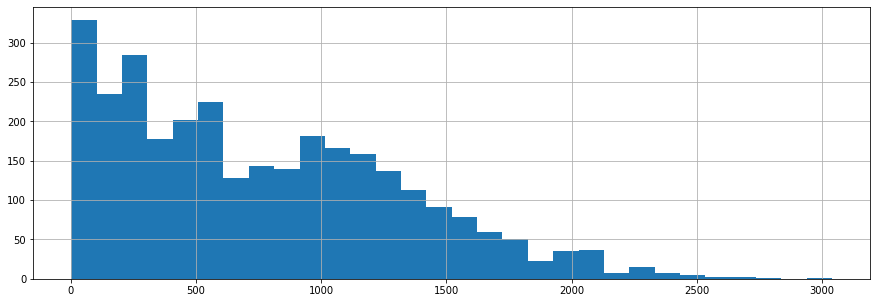

In [58]:
#顯示first_review_to_20190801的天數直方圖
df.first_review_to_20190801.hist(figsize=(15,5), bins=30);

In [59]:
# 將first_review_to_20190801依天數分類為 0-3 months, 3-6 months, 6-12 months,1+ years
bin_column('first_review_to_20190801',
           bins=[0, 91, 182, 365, max(df.first_review_to_20190801)],
           labels=['0-3 months',
                   '3-6 months',
                   '6-12 months',
                   '1+ years'],
           na_label='unknown')

In [60]:
#顯示分類後的各等級筆數
df.first_review_to_20190801.value_counts()

1+ years       2072
6-12 months     456
0-3 months      286
3-6 months      218
Name: first_review_to_20190801, dtype: int64

In [61]:
#將空值補眾數 1+ years
df.first_review_to_20190801.replace('nan','1+ years', inplace=True)

In [62]:
#顯示修正後的各等級筆數
df.first_review_to_20190801.value_counts()

1+ years       2072
6-12 months     456
0-3 months      286
3-6 months      218
Name: first_review_to_20190801, dtype: int64

In [63]:
#用pandas轉換天數
df.last_review = pd.to_datetime(df.first_review) 

#計算房東last_review到2019.8.1的總天數
df['last_review_to_20190801'] = (datetime(2019, 8, 1) - df.first_review).astype('timedelta64[D]')

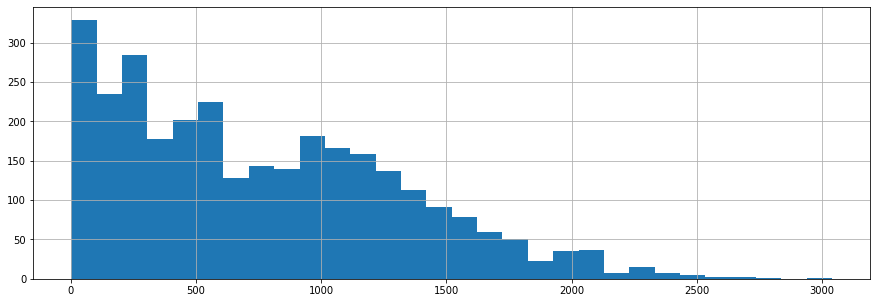

In [64]:
#顯示last_review_to_20190801的天數直方圖
df.last_review_to_20190801.hist(figsize=(15,5), bins=30);

In [65]:
# 將last_review_to_20190801依天數分類為 0-3 months, 3-6 months, 6-12 months,1+ years
bin_column('last_review_to_20190801',
           bins=[0, 91, 182, 365, max(df.last_review_to_20190801)],
           labels=['0-3 months',
                   '3-6 months',
                   '6-12 months',
                   '1+ years'],
           na_label='unknown')

In [66]:
#顯示分類後的各等級筆數
df.last_review_to_20190801.value_counts()

1+ years       2072
6-12 months     456
0-3 months      286
3-6 months      218
Name: last_review_to_20190801, dtype: int64

In [67]:
#將空值補眾數 1+ years
df.last_review_to_20190801.replace('nan','1+ years', inplace=True)

In [68]:
#顯示修正後的各等級筆數
df.last_review_to_20190801.value_counts()

1+ years       2072
6-12 months     456
0-3 months      286
3-6 months      218
Name: last_review_to_20190801, dtype: int64

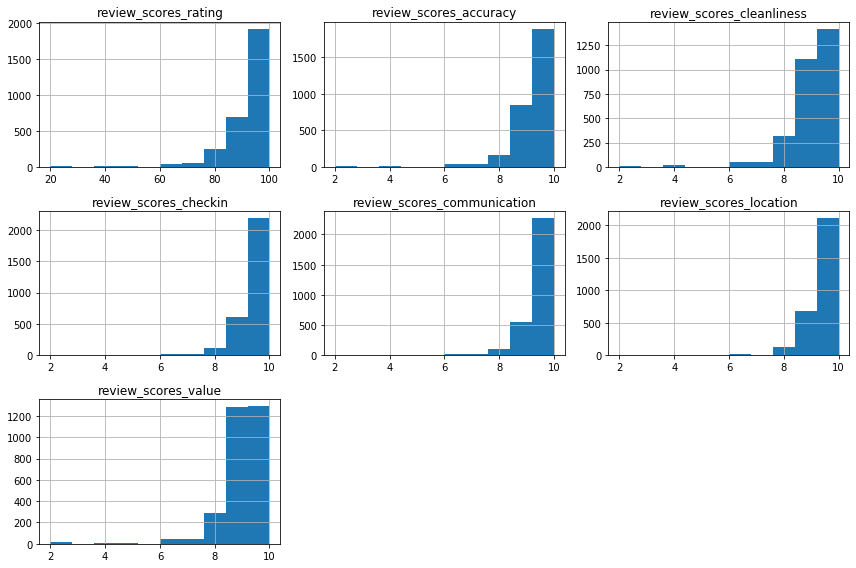

In [69]:
# 顯示review_scores_rating相關的的直方圖
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [70]:
#刪除review_scores相關的有空值的欄位
#df.dropna(subset=['review_scores_rating'], inplace=True)
#df.dropna(subset=['review_scores_accuracy'], inplace=True)
#df.dropna(subset=['review_scores_cleanliness'], inplace=True)
#df.dropna(subset=['review_scores_checkin'], inplace=True)
#df.dropna(subset=['review_scores_communication'], inplace=True)
#df.dropna(subset=['review_scores_location'], inplace=True)
#df.dropna(subset=['review_scores_value'], inplace=True)

In [71]:
#將review_scores相關的有空值替換為nan
df.review_scores_rating.fillna('nan', inplace=True)
df.review_scores_accuracy.fillna('nan', inplace=True)
df.review_scores_cleanliness.fillna('nan', inplace=True)
df.review_scores_checkin.fillna('nan', inplace=True)
df.review_scores_communication.fillna('nan', inplace=True)
df.review_scores_location.fillna('nan', inplace=True)
df.review_scores_value.fillna('nan', inplace=True)

In [72]:
#顯示所有amenities的設施
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Bed linens',
 'Breakfast',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling hoist',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'EV charger',
 'Electric profiling bed',
 'Elevator',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower',
 'Fixed grab bars for toilet',
 'Flat path to guest entrance',
 'Free parking 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

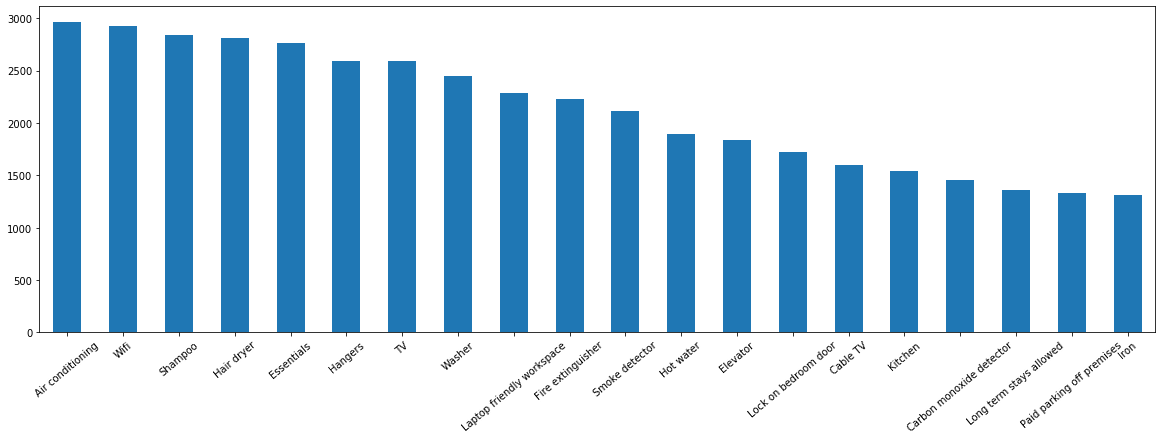

In [73]:
#抓取設施的Top 20
raw_df['amenities'] = raw_df.amenities.str.replace('[{}]' , '').str.replace('"','')
raw_df.amenities.head()
all_item_ls = np.concatenate(raw_df.amenities.map(lambda am:am.split(',')))
Top20_item = pd.Series(all_item_ls).value_counts().head(20)
plt.figure(figsize=  (20 , 6))
Top20_item.plot(kind = 'bar')
plt.xticks(rotation = 40)

In [74]:
#將Top 20設施改為T/F後個別新增20個欄位
df.loc[df['amenities'].str.contains('Air conditioning'), 'Air conditioning'] = 1
df.loc[df['amenities'].str.contains('Wifi'), 'Wifi'] = 1
df.loc[df['amenities'].str.contains('Hair dryer'), 'Hair dryer'] = 1
df.loc[df['amenities'].str.contains('Shampoo'), 'Shampoo'] = 1
df.loc[df['amenities'].str.contains('Essentials'), 'Essentials'] = 1
df.loc[df['amenities'].str.contains('TV'), 'TV'] = 1
df.loc[df['amenities'].str.contains('Hangers'), 'Hangers'] = 1
df.loc[df['amenities'].str.contains('Washer'), 'Washer'] = 1
df.loc[df['amenities'].str.contains('Laptop friendly workspace'), 'Laptop friendly workspace'] = 1
df.loc[df['amenities'].str.contains('Fire extinguisher'), 'Fire extinguisher'] = 1
df.loc[df['amenities'].str.contains('Smoke detector'), 'Smoke detector'] = 1
df.loc[df['amenities'].str.contains('Hot water'), 'Hot water'] = 1
df.loc[df['amenities'].str.contains('Elevator'), 'Elevator'] = 1
df.loc[df['amenities'].str.contains('Lock on bedroom door'), 'Lock on bedroom door'] = 1
df.loc[df['amenities'].str.contains('Carbon monoxide detector'), 'Carbon monoxide detector'] = 1
df.loc[df['amenities'].str.contains('Cable TV'), 'Cable TV'] = 1
df.loc[df['amenities'].str.contains('Kitchen'), 'Kitchen'] = 1
df.loc[df['amenities'].str.contains('Long term stays allowed'), 'Long term stays allowed'] = 1
df.loc[df['amenities'].str.contains('Refrigerator'), 'Refrigerator'] = 1
df.loc[df['amenities'].str.contains('Paid parking off premises'), 'Paid parking off premises'] = 1

In [75]:
#將新產的的欄位，空值設為0，並刪除原本的amenities欄位
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)
df.drop('amenities', axis=1, inplace=True)

In [76]:
#修改後的檔案輸出
df.to_csv('listing_bad_clean.csv', index = False)